# Training and validation 

To start training-

i) Folders for Training , training label, Validation and validation label images should be there along with this code file

ii) Network and modeling folder (as given in github) should also be in same folder

Just run all the codes sequentially and you will get the output

Note:

i) all the images should be in .jpg 
ii) You can change the batch size, image resizing size (if 400 then the resized image would be 400 X 400) ,optimizer, scheduler and number of epochs in the below cell.
iii) Batch size=12 and image resize=400 will cost ~10gb gpu memory and about half hour to train.
iv) ideal epochs = 50 (Highest accurate model would be saved )



In [1]:
import os
import copy
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torchvision
from torchvision import transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import cv2 

batch     = 12
size      = 400
epochs    = 50

In [2]:
# Import train, validation and test images from the folders and store in a list

import os
# To load images

def load_img(folder):
    c = 0;
    images = [];
    filenam =[];
    for filename in os.listdir(folder): # List all the filenames in the folde
        print('nwname ',filename)
        c = c + 1;
        print(c);
        img = cv2.imread(os.path.join(folder, filename)); 
        img = cv2.resize(img, (size,size))
        images.append(img);
        del img

    return images

# To load labeled gray-scaled images

def load_label_img(folder):
    images = [];
    c = 0;
    for filename in os.listdir(folder): # List all the filenames in the folder
        c = c + 1;
        print(c);
        img = cv2.imread(os.path.join(folder, filename));
        img = cv2.resize(img, (size,size)) 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY);
        # del img1
       
        images.append(img);
        del img
        

    return images


In [3]:
# Convert the output labels to pixel-wise classes

def c2g(cn):
    cn1 = np.reshape(cn, (1, 1, 3));
    cn = cv2.cvtColor(cn1, cv2.COLOR_BGR2GRAY);
    del cn1
    return cn;

colors = [];
colors.append(c2g(np.array([0, 0, 0], dtype = 'uint8')));
colors.append(c2g(np.array([255, 255, 255], dtype = 'uint8')));

# colors.append(c2g(np.array([0, 0, 0], dtype = 'uint8')));

import torch
from PIL import Image
from torch import Tensor
from torchvision.transforms import transforms
import torchvision.transforms.functional as F

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import numbers
from abc import abstractmethod
from typing import Tuple
import random


# 

def class_pixel(label_img):
    # print(label_img.shape)
    
    aa,bb = label_img.shape

    
    class_pix = np.ones([aa, bb, 1], dtype = int);
    for index, c in enumerate(colors):
        
        class_pix[label_img == c] = index; 
    # print(class_pix)
    

    return class_pix
def label_img_list(img_list):
    images = [];
    for image in img_list:
        images.append(class_pixel(image));
    del img_list
    return images;


# Data Loading

In [4]:
# FOR VALIDATION

import os

# To load images

def loads_img(folder):
    c = 0;
    images = [];
    filenam =[];
    for filename in os.listdir(folder): # List all the filenames in the folde
        print('nwname ',filename)
        c = c + 1;
        print(c);
        img = cv2.imread(os.path.join(folder, filename)); 
        img = cv2.resize(img, (size,size))
        images.append(img);
        # if c==16:
          # break
        del img

    return images

# To load labeled gray-scaled images

def loads_label_img(folder):
    images = [];
    c = 0;
    for filename in os.listdir(folder): # List all the filenames in the folder
        c = c + 1;
        # print(c);
        img = cv2.imread(os.path.join(folder, filename));
       
        images.append(img);
        # if c==14:
        #   break
        del img
        


    return images

def matplotlib_imshow(display_list):
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        # plt.title(title[i])
        plt.imshow(display_list[i])
        plt.axis('off')
    plt.show()

transform_img = transforms.Compose([ 
    transforms.ToTensor()]);
    

transform_img_label = transforms.Compose([
    transforms.ToTensor()
]);

from torch.utils.data import Dataset, DataLoader


    
class testsett(data.Dataset):
    def __init__(self, transform = None, root_test = None, root_test_label = None, transform_label = None):
        self.test_img= loads_img(root_test);
        self.transform = transform;
        # self.transform_label = transform_label;
        self.test_label_img = loads_label_img(root_test_label);
        
    def __len__(self):
        return len(self.test_img);
    
    def __getitem__(self, index):
        img = self.transform(self.test_img[index]);
        label = self.test_label_img[index];
        # name = self.name[index]


        return img, label;


testdatasets = testsett(transform_img, 'val', 'val_labels', transform_img_label);

val_loader = data.DataLoader(testdatasets, batch_size = 1, shuffle=False,  num_workers=0);

nwname  ckcu8ty6z00003b5yzfaezbs5.jpg
1
nwname  ckcu8v7pr00013b5ymfi2z7uf.jpg
2
nwname  ckcu8w7vy00023b5y3vt2wczx.jpg
3
nwname  ckcu8xad600033b5yc78xfyjx.jpg
4
nwname  ckcu99qx200043b5yd2c5g84t.jpg
5
nwname  ckcu9ejjf00053b5y4mf7bilw.jpg
6
nwname  ckcu9ij2e00063b5yrrbb3f2o.jpg
7
nwname  ckcu9j9vo00073b5y3m92mu6n.jpg
8
nwname  ckcu9jucf00083b5ytpqoue72.jpg
9
nwname  ckcu9ksoq00093b5ylw5wwfr2.jpg
10
nwname  ckcu9lvft000a3b5yb79pnr64.jpg
11
nwname  ckcu9mtrc000b3b5y826amhgq.jpg
12
nwname  ckcu9newl000c3b5ynkam0whb.jpg
13
nwname  ckcu9qend000d3b5y0mgn5fhw.jpg
14
nwname  ckcu9r72l000e3b5yerhwmjut.jpg
15
nwname  ckcu9ru1s000f3b5yi4748k4m.jpg
16
nwname  ckcu9sikm000g3b5y1yd89b1g.jpg
17
nwname  ckcu9t8au000h3b5y7l82d9jh.jpg
18
nwname  ckcu9tscz000i3b5yqgmkln7u.jpg
19
nwname  ckcu9vda7000k3b5yh7a2gh5v.jpg
20
nwname  ckcu9w0ls000l3b5yfqcnpqny.jpg
21
nwname  ckcu9xaug000n3b5y480n145d.jpg
22
nwname  ckcu9yqhb000o3b5y5o6idona.jpg
23
nwname  ckcu9zqev000p3b5ylwdnm6e8.jpg
24
nwname  ckcua0dkl000q3b5y

In [5]:
# Define the transformations that have to be applied on the images
def matplotlib_imshow(display_list):
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.imshow(display_list[i])
        plt.axis('off')
    plt.show()

transform_img = transforms.Compose([ 
    transforms.ToTensor()]);
    

transform_img_label = transforms.Compose([
    transforms.ToTensor()
]);

from torch.utils.data import Dataset, DataLoader

# We have to create custom classes in order to use the DataLoader. These classes inherit the Dataset class

class trainset(data.Dataset):
    def __init__(self, transform = None, root_train = None, root_train_label = None, transform_label = None):
        self.train_img = load_img(root_train);
        self.transform = transform;
        self.transform_label = transform_label;
        self.train_label_img = label_img_list(load_label_img(root_train_label));
        
    def __len__(self):
        return len(self.train_img);
    
    def __getitem__(self, index):
        img = self.transform(self.train_img[index]);
        label = self.transform_label(self.train_label_img[index]);
        # print(index)
        return img, label;

class valset(data.Dataset):
    def __init__(self, transform = None, root_val = None, root_val_label = None, transform_label = None):
        self.val_img = load_img(root_val);
        self.transform = transform;
        self.transform_label = transform_label;
        self.val_label_img = label_img_list(load_label_img(root_val_label));
        
    def __len__(self):
        return len(self.val_img);
    
    def __getitem__(self, index):
        img = self.transform(self.val_img[index]);
        label = self.transform_label(self.val_label_img[index]);
        

        return img, label;

    
class testset(data.Dataset):
    def __init__(self, transform = None, root_test = None, root_test_label = None, transform_label = None):
        self.test_img= load_img(root_test);
        self.transform = transform;
        self.transform_label = transform_label;
        self.test_label_img = label_img_list(load_label_img(root_test_label));
        
    def __len__(self):
        return len(self.test_img);
    
    def __getitem__(self, index):
        img = self.transform(self.test_img[index]);
        label = self.transform_label(self.test_label_img[index]);
        # name = self.name[index]


        return img, label;


traindataset = trainset(transform_img, 'train', 'train_labels', transform_img_label);
train_loader = data.DataLoader(traindataset, batch_size = batch, shuffle=True,  num_workers=0);

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'train'

# Model 

In [6]:
import torch
from torch import nn
from torch.nn import functional as F

from numpy.linalg import svd
from numpy.random import normal
from math import sqrt
import torchvision.models as models

import torch
import torch.nn as nn
import torch.nn.functional as F
from network.utils import IntermediateLayerGetter
from network._deeplab import DeepLabHead, DeepLabHeadV3Plus, DeepLabV3
from network.backbone import resnet
from network.backbone import mobilenetv2

def _segm_resnet(name, backbone_name, num_classes, output_stride, pretrained_backbone):

    if output_stride==8:
        replace_stride_with_dilation=[False, True, True]
        aspp_dilate = [12, 24, 36]
    else:
        replace_stride_with_dilation=[False, False, True]
        aspp_dilate = [6, 12, 18]

    backbone = resnet.__dict__[backbone_name](
        pretrained=pretrained_backbone,
        replace_stride_with_dilation=replace_stride_with_dilation)
    
    inplanes = 2048
    low_level_planes = 256

    if name=='deeplabv3plus':
        return_layers = {'layer4': 'out', 'layer1': 'low_level'}
        classifier = DeepLabHeadV3Plus(inplanes, low_level_planes, num_classes, aspp_dilate)
    elif name=='deeplabv3':
        return_layers = {'layer4': 'out'}
        classifier = DeepLabHead(inplanes , num_classes, aspp_dilate)
    backbone = IntermediateLayerGetter(backbone, return_layers=return_layers)

    model = DeepLabV3(backbone, classifier)
    return model

def _segm_mobilenet(name, backbone_name, num_classes, output_stride, pretrained_backbone):
    if output_stride==8:
        aspp_dilate = [12, 24, 36]
    else:
        aspp_dilate = [6, 12, 18]

    backbone = mobilenetv2.mobilenet_v2(pretrained=pretrained_backbone, output_stride=output_stride)
    
    # rename layers
    backbone.low_level_features = backbone.features[0:4]
    backbone.high_level_features = backbone.features[4:-1]
    backbone.features = None
    backbone.classifier = None

    inplanes = 320
    low_level_planes = 24
    
    if name=='deeplabv3plus':
        return_layers = {'high_level_features': 'out', 'low_level_features': 'low_level'}
        classifier = DeepLabHeadV3Plus(inplanes, low_level_planes, num_classes, aspp_dilate)
    elif name=='deeplabv3':
        return_layers = {'high_level_features': 'out'}
        classifier = DeepLabHead(inplanes , num_classes, aspp_dilate)
    backbone = IntermediateLayerGetter(backbone, return_layers=return_layers)

    model = DeepLabV3(backbone, classifier)
    return model

def _load_model(arch_type, backbone, num_classes, output_stride, pretrained_backbone):

    if backbone=='mobilenetv2':
        model = _segm_mobilenet(arch_type, backbone, num_classes, output_stride=output_stride, pretrained_backbone=pretrained_backbone)
    elif backbone.startswith('resnet'):
        model = _segm_resnet(arch_type, backbone, num_classes, output_stride=output_stride, pretrained_backbone=pretrained_backbone)
    else:
        raise NotImplementedError
    return model


# Deeplab v3

def deeplabv3_resnet50(num_classes=21, output_stride=8, pretrained_backbone=True):
    """Constructs a DeepLabV3 model with a ResNet-50 backbone.
    Args:
        num_classes (int): number of classes.
        output_stride (int): output stride for deeplab.
        pretrained_backbone (bool): If True, use the pretrained backbone.
    """
    return _load_model('deeplabv3', 'resnet50', num_classes, output_stride=output_stride, pretrained_backbone=pretrained_backbone)

def deeplabv3_resnet101(num_classes=21, output_stride=8, pretrained_backbone=True):
    """Constructs a DeepLabV3 model with a ResNet-101 backbone.
    Args:
        num_classes (int): number of classes.
        output_stride (int): output stride for deeplab.
        pretrained_backbone (bool): If True, use the pretrained backbone.
    """
    return _load_model('deeplabv3', 'resnet101', num_classes, output_stride=output_stride, pretrained_backbone=pretrained_backbone)

def deeplabv3_mobilenet(num_classes=21, output_stride=8, pretrained_backbone=True, **kwargs):
    """Constructs a DeepLabV3 model with a MobileNetv2 backbone.
    Args:
        num_classes (int): number of classes.
        output_stride (int): output stride for deeplab.
        pretrained_backbone (bool): If True, use the pretrained backbone.
    """
    return _load_model('deeplabv3', 'mobilenetv2', num_classes, output_stride=output_stride, pretrained_backbone=pretrained_backbone)


# Deeplab v3+

def deeplabv3plus_resnet50(num_classes=23, output_stride=2, pretrained_backbone=True):
    """Constructs a DeepLabV3 model with a ResNet-50 backbone.
    Args:
        num_classes (int): number of classes.
        output_stride (int): output stride for deeplab.
        pretrained_backbone (bool): If True, use the pretrained backbone.
    """
    return _load_model('deeplabv3plus', 'resnet50', num_classes, output_stride=output_stride, pretrained_backbone=pretrained_backbone)


def deeplabv3plus_resnet101(num_classes=21, output_stride=8, pretrained_backbone=True):
    """Constructs a DeepLabV3+ model with a ResNet-101 backbone.
    Args:
        num_classes (int): number of classes.
        output_stride (int): output stride for deeplab.
        pretrained_backbone (bool): If True, use the pretrained backbone.
    """
    return _load_model('deeplabv3plus', 'resnet101', num_classes, output_stride=output_stride, pretrained_backbone=pretrained_backbone)


def deeplabv3plus_mobilenet(num_classes=21, output_stride=8, pretrained_backbone=True):
    """Constructs a DeepLabV3+ model with a MobileNetv2 backbone.
    Args:
        num_classes (int): number of classes.
        output_stride (int): output stride for deeplab.
        pretrained_backbone (bool): If True, use the pretrained backbone.
    """
    return _load_model('deeplabv3plus', 'mobilenetv2', num_classes, output_stride=output_stride, pretrained_backbone=pretrained_backbone)


In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu");
print(device)
UNET = deeplabv3plus_resnet101(num_classes=2, output_stride=2, pretrained_backbone=True)
UNET.to(device);

# weightsInit(UNET)
PATH = 'weights/chal2.pth';
UNET.load_state_dict(torch.load(PATH))
# !zip -r /content/file.zip /content/test_input_data

cuda:0


<All keys matched successfully>

# Utils

In [9]:
colors = [];
colors.append(np.array([0, 0, 0], dtype = 'uint8'));
colors.append(np.array([255, 255, 255], dtype = 'uint8'));

ClassesColors = {
    (0,0,0): 0 ,
     (255,255,255): 1
            
    }

import numpy as np

color_mapping = {
     0 : [0,0,0], 
     1 : [255,255,255]
}
    

def visualize_prediction(prediction):
    color_image = np.zeros((prediction.shape[0], prediction.shape[1], 3))
    for color_id in color_mapping.keys():
        color_image[prediction == color_id] = color_mapping[color_id]
    return color_image.astype(np.uint8)


def corr(x): # To get proper correspondence between the outputs and the labels
    x = x.cpu();
    x = x.detach().numpy(); # Detach() was used as one can't convert a pytorch tensor to a numpy array if
    # required_grad is set True for that variable
    x = x.argmax(axis = 1);
    return x;

import numpy as np

color_mapping = {
     0 : [0,0,0], 
     1 : [255,255,255]
}

    
def class_pixel(label_img):
    aa,bb = label_img.shape
    
    class_pix = np.ones([aa, bb, 1], dtype = int);
    for index, c in enumerate(colors):
        
        if index==0:
          class_pix[label_img <=122] = index; 
        else:
          class_pix[label_img >=123] = index; 
    return class_pix

# Loss Function

In [10]:
criterion = nn.CrossEntropyLoss().to(device);
optimizer = optim.Adam(UNET.parameters(),lr=0.0001 );
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.95)

# Training


In [ ]:
CUDA_LAUNCH_BLOCKING=1
los=0
kb=0
km=1
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
init=85
UNET.train()
for epoch in range(epochs):

  print('epoch-                ',epoch)
  print('prev loss-            ',(kb/6000)*batch)
  print('final loss-           ',(los/6000)*batch)
  kb=los
  los=0
  UNET.train()
  for i, data in enumerate(train_loader):
    inputs, labels = data;
    
    labels = labels.reshape(batch, size, size);
    
    inputs, labels = inputs.to(device), labels.to(device);
    optimizer.zero_grad();
    
    output1 = UNET(inputs);
    labels = labels.to(dtype=torch.long)

    loss1 = criterion(output1, labels);
    loss1.backward();
    optimizer.step();
    los+=loss1.item()
    
    if i%60==59:

      with torch.no_grad():
        correct = 0;
        total = 0;
        UNET.eval()
        import cv2
        def _fast_hist(label_pred, label_true, n_class):
            mask = (label_true >= 0) & (label_true < n_class)
            hist = np.bincount(
                n_class * label_true[mask].astype(int) + label_pred[mask], minlength=n_class ** 2
            ).reshape(n_class, n_class)
            return hist


        def evaluate(predictions, gts, num_classes):
            hist = np.zeros((num_classes, num_classes))
            for lp, lt in zip(predictions, gts):
                hist += _fast_hist(lp.flatten(), lt.flatten(), num_classes)
            
            iu = np.diag(hist) / (hist.sum(axis=1) + hist.sum(axis=0) - np.diag(hist))
            mean_iu = np.nanmean(iu)
            
            return mean_iu

        for i, data in enumerate(val_loader):
            inputs, labels = data;
            inputs = inputs.to(device);

            outputs = UNET.forward(inputs);
            outputs = corr(outputs);
            labels = labels.detach().numpy();
            outputs = outputs.reshape(1, size, size);
            correct=correct+1

            color_pred=labels[0]
            d1,a1,b1 =labels[0].shape
            
            color_pre=outputs
            
            dd,aa,bb = color_pre.shape
            d1,a1,b1 =labels[0].shape

            color_pre=np.array(color_pre).reshape(aa,bb)


            color_pre=visualize_prediction(color_pre)
            img = cv2.resize(color_pre, (a1,d1))
            
            img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY);
            img2 = cv2.cvtColor(color_pred, cv2.COLOR_BGR2GRAY);
            img1 = class_pixel(img1)
            img2 = class_pixel(img2)
            
            io=evaluate(img1,img2,2)
            total=total+io

        print("Hence, the test set accuracy is ", (total/correct) * 100);
        if (total/correct) * 100>init:
          init=(total/correct) * 100
          PATH = 'pathmax101res.pth';
          torch.save(UNET.state_dict(),PATH); 
        print("Highest accuracy :",init)        
    


        UNET.train()

  scheduler.step()
  print('Epoch    -    {0}    lr    :     {1}'.format(epoch, optimizer.param_groups[0]['lr']))
  if epoch%1==0:



    with torch.no_grad():
      correct = 0;
      total = 0;
      UNET.eval()
      import cv2
      def _fast_hist(label_pred, label_true, n_class):
          mask = (label_true >= 0) & (label_true < n_class)
          hist = np.bincount(
              n_class * label_true[mask].astype(int) + label_pred[mask], minlength=n_class ** 2
          ).reshape(n_class, n_class)
          return hist


      def evaluate(predictions, gts, num_classes):
          hist = np.zeros((num_classes, num_classes))
          for lp, lt in zip(predictions, gts):
              hist += _fast_hist(lp.flatten(), lt.flatten(), num_classes)
          
          iu = np.diag(hist) / (hist.sum(axis=1) + hist.sum(axis=0) - np.diag(hist))
          mean_iu = np.nanmean(iu)
          
          return mean_iu

      for i, data in enumerate(val_loader):
          inputs, labels = data;
          inputs = inputs.to(device);

          outputs = UNET.forward(inputs);
          outputs = corr(outputs);
          labels = labels.detach().numpy();
          outputs = outputs.reshape(1, size, size);
          correct=correct+1

          color_pred=labels[0]
          d1,a1,b1 =labels[0].shape
          color_pre=outputs
          # print('shape ',color_pre.shape)
          dd,aa,bb = color_pre.shape
          d1,a1,b1 =labels[0].shape

          color_pre=np.array(color_pre).reshape(aa,bb)


          color_pre=visualize_prediction(color_pre)
          img = cv2.resize(color_pre, (a1,d1))
          
          img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY);
          img2 = cv2.cvtColor(color_pred, cv2.COLOR_BGR2GRAY);
          img1 = class_pixel(img1)
          img2 = class_pixel(img2)

          io=evaluate(img1,img2,2)
          total=total+io

      print("Hence, the test set accuracy is ", (total/correct) * 100);
      if (total/correct) * 100>init:
          init=(total/correct) * 100
          PATH = 'pathmax101res.pth';
          torch.save(UNET.state_dict(),PATH); 


# Validation Utilities

In [11]:

def class_pixel(label_img):
    # print(label_img.shape)
    
    aa,bb = label_img.shape
    
    class_pix = np.ones([aa, bb, 1], dtype = int);
    for index, c in enumerate(colors):
        if index==0:
          class_pix[label_img <=122] = index; 
        else:
          class_pix[label_img >=123] = index; 
    return class_pix

import numpy as np
np.seterr(divide='ignore', invalid='ignore')
__all__ = ['SegmentationMetric']

"""
confusionMetric  # 注意：此处横着代表预测值，竖着代表真实值，与之前介绍的相反
P\L     P    N
P      TP    FP
N      FN    TN
sum(axis=0) TP+FN
sum(axis=1) TP+FP
np.diag().sum() TP+TN
"""
class SegmentationMetric(object):
    def __init__(self, numClass):
        self.numClass = numClass
        self.confusionMatrix = np.zeros((self.numClass,)*2)

    def pixelAccuracy(self):
        # return all class overall pixel accuracy
        #  PA = acc = (TP + TN) / (TP + TN + FP + FN)
        acc = np.diag(self.confusionMatrix).sum() /  self.confusionMatrix.sum()
        return acc

    def meanPixelAccuracy(self):
        # return each category pixel accuracy(A more accurate way to call it precision)
        # acc = TP / (TP + FP)
        Cpa = np.diag(self.confusionMatrix) / self.confusionMatrix.sum(axis=1)
        Mpa = np.nanmean(Cpa)  
        return Mpa, Cpa


    def meanIntersectionOverUnion(self):
        # Intersection = TP ;Union = TP + FP + FN
        # Ciou = TP / (TP + FP + FN)
        intersection = np.diag(self.confusionMatrix)
        union = np.sum(self.confusionMatrix, axis=1) + np.sum(self.confusionMatrix, axis=0) - np.diag(self.confusionMatrix) # axis = 1表示混淆矩阵行的值，返回列表； axis = 0表示取混淆矩阵列的值，返回列表

        Ciou = (intersection / np.maximum(1.0, union))   
        mIoU = np.nanmean(Ciou)  
        return mIoU, Ciou

    def Frequency_Weighted_Intersection_over_Union(self):
        # FWIOU =     [(TP+FN)/(TP+FP+TN+FN)] *[TP / (TP + FP + FN)]
        freq = np.sum(self.confusionMatrix, axis=1) / np.sum(self.confusionMatrix)
        iu = np.diag(self.confusionMatrix) / (
                np.sum(self.confusionMatrix, axis=1) + np.sum(self.confusionMatrix, axis=0) -
                np.diag(self.confusionMatrix))
        FWIoU = (freq[freq > 0] * iu[freq > 0]).sum()
        return FWIoU

    def precision(self):
        # precision = TP / (TP+FP)
        precision = np.diag(self.confusionMatrix) / np.sum(self.confusionMatrix, axis=1)
        return precision

    def recall(self):
        # recall = TP / (TP+FN)
        recall = np.diag(self.confusionMatrix) / np.sum(self.confusionMatrix, axis=0)
        return recall

    def genConfusionMatrix(self, imgPredict, imgLabel):
        # remove classes from unlabeled pixels in gt image and predict
        mask = (imgLabel >= 0) & (imgLabel < self.numClass)
        label = self.numClass * imgLabel[mask].astype('int') + imgPredict[mask]
        count = np.bincount(label, minlength=self.numClass**2)
        confusionMatrix = count.reshape(self.numClass, self.numClass)
        return confusionMatrix

    def addBatch(self, imgPredict, imgLabel):
        assert imgPredict.shape == imgLabel.shape
        self.confusionMatrix += self.genConfusionMatrix(imgPredict, imgLabel)

    def reset(self):
        self.confusionMatrix = np.zeros((self.numClass, self.numClass))

if __name__ == '__main__':
    imgPredict = np.array([0, 0, 0, 0])
    imgLabel = np.array([0, 0, 0, 0]) 
    metric = SegmentationMetric(2) 
    metric.addBatch(imgPredict, imgLabel)
    pa = metric.pixelAccuracy()
    cpa = metric.recall()[0]
    pre = metric.precision()[0]
    mpa = metric.meanPixelAccuracy()
    mIoU, per = metric.meanIntersectionOverUnion()

EPS = 1e-10
def nanmean(x):
    """Computes the arithmetic mean ignoring any NaNs."""
    return torch.mean(x[x == x])
def _fast_hist(true, pred, num_classes):
    mask = (true >= 0) & (true < num_classes)
    hist = torch.bincount(
        num_classes * true[mask] + pred[mask],
        minlength=num_classes ** 2,
    ).reshape(num_classes, num_classes).float()
    return hist
def dice_coefficient(hist):
    """Computes the Sørensen–Dice coefficient, a.k.a the F1 score.
    Args:
        hist: confusion matrix.
    Returns:
        avg_dice: the average per-class dice coefficient.
    """
    A_inter_B = torch.diag(hist)
    A = hist.sum(dim=1)
    B = hist.sum(dim=0)
    dice = (2 * A_inter_B) / (A + B + EPS)
    avg_dice = nanmean(dice)
    return avg_dice


def eval_metrics(true, pred, num_classes):
    """Computes various segmentation metrics on 2D feature maps.
    Args:
        true: a tensor of shape [B, H, W] or [B, 1, H, W].
        pred: a tensor of shape [B, H, W] or [B, 1, H, W].
        num_classes: the number of classes to segment. This number
            should be less than the ID of the ignored class.
    Returns:
        overall_acc: the overall pixel accuracy.
        avg_per_class_acc: the average per-class pixel accuracy.
        avg_jacc: the jaccard index.
        avg_dice: the dice coefficient.
    """
    hist = torch.zeros((num_classes, num_classes))
    for t, p in zip(true, pred):
        hist += _fast_hist(t.flatten(), p.flatten(), num_classes)
    
    avg_dice = dice_coefficient(hist)
    return avg_dice


# Validation

   0


C:\Users\ASUS\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


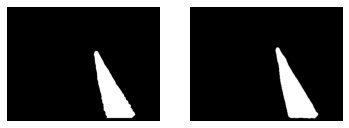

   pixel acc is : 0.995355
   mIoU is : 0.965331
   mIoU (2nd code) is : 0.965331
   recall:  0.9995689371744197
   precision:  0.9954452189350834
   F2 score:  0.9987414625314999
dice coeff:  tensor(0.9821, dtype=torch.float64)
   1


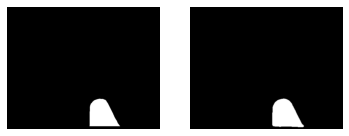

   pixel acc is : 0.997555
   mIoU is : 0.963455
   mIoU (2nd code) is : 0.963455
   recall:  0.99993506104262
   precision:  0.9975382346052455
   F2 score:  0.9994547747650592
dice coeff:  tensor(0.9811, dtype=torch.float64)
   2


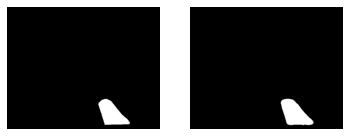

   pixel acc is : 0.997131
   mIoU is : 0.948270
   mIoU (2nd code) is : 0.948270
   recall:  0.9999801434141911
   precision:  0.9970747135966421
   F2 score:  0.9993977036334745
dice coeff:  tensor(0.9728, dtype=torch.float64)
   3


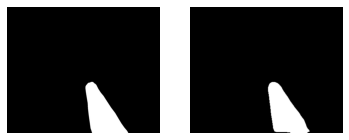

   pixel acc is : 0.995459
   mIoU is : 0.962216
   mIoU (2nd code) is : 0.962216
   recall:  0.9988182058231316
   precision:  0.996344139899067
   F2 score:  0.9983224101723461
dice coeff:  tensor(0.9805, dtype=torch.float64)
   4


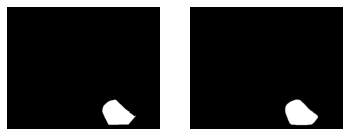

   pixel acc is : 0.997837
   mIoU is : 0.964576
   mIoU (2nd code) is : 0.964576
   recall:  0.9999502076341655
   precision:  0.997821253338302
   F2 score:  0.9995236903101088
dice coeff:  tensor(0.9817, dtype=torch.float64)
   5


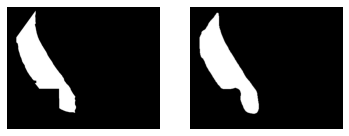

   pixel acc is : 0.987148
   mIoU is : 0.940569
   mIoU (2nd code) is : 0.940569
   recall:  0.9992773494386407
   precision:  0.9862586849341817
   F2 score:  0.9966461934103373
dice coeff:  tensor(0.9688, dtype=torch.float64)
   6


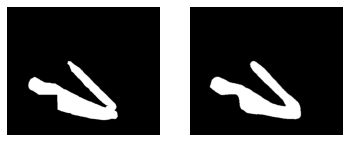

   pixel acc is : 0.986975
   mIoU is : 0.930674
   mIoU (2nd code) is : 0.930674
   recall:  0.9946976784161794
   precision:  0.9908653545355458
   F2 score:  0.9939288439369366
dice coeff:  tensor(0.9633, dtype=torch.float64)
   7


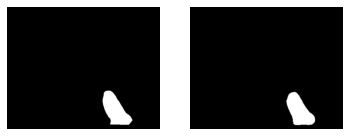

   pixel acc is : 0.996323
   mIoU is : 0.942110
   mIoU (2nd code) is : 0.942110
   recall:  0.9976495343839542
   precision:  0.9985560753131201
   F2 score:  0.9978307108651036
dice coeff:  tensor(0.9694, dtype=torch.float64)
   8


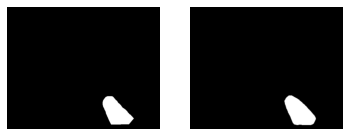

   pixel acc is : 0.997174
   mIoU is : 0.953552
   mIoU (2nd code) is : 0.953552
   recall:  0.9996914041112936
   precision:  0.9973978507438969
   F2 score:  0.9992318499679607
dice coeff:  tensor(0.9757, dtype=torch.float64)
   9


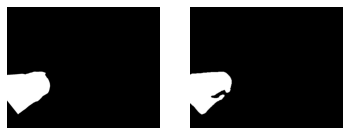

   pixel acc is : 0.991519
   mIoU is : 0.937209
   mIoU (2nd code) is : 0.937209
   recall:  0.9940982745263333
   precision:  0.9968004024052045
   F2 score:  0.9946375274772515
dice coeff:  tensor(0.9668, dtype=torch.float64)
   10


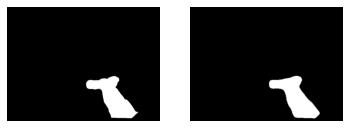

   pixel acc is : 0.997226
   mIoU is : 0.974502
   mIoU (2nd code) is : 0.974502
   recall:  0.9989479410559412
   precision:  0.9981131442965716
   F2 score:  0.9987808700102648
dice coeff:  tensor(0.9870, dtype=torch.float64)
   11


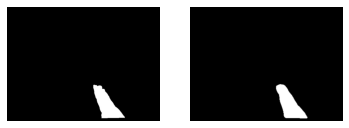

   pixel acc is : 0.997380
   mIoU is : 0.956095
   mIoU (2nd code) is : 0.956095
   recall:  0.9995360764657886
   precision:  0.9977659403645706
   F2 score:  0.9991815469601415
dice coeff:  tensor(0.9771, dtype=torch.float64)
   12


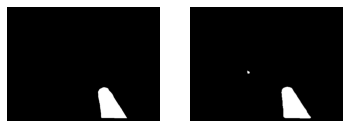

   pixel acc is : 0.996960
   mIoU is : 0.953164
   mIoU (2nd code) is : 0.953164
   recall:  0.9996235441563999
   precision:  0.9972381361151026
   F2 score:  0.9991455500358047
dice coeff:  tensor(0.9755, dtype=torch.float64)
   13


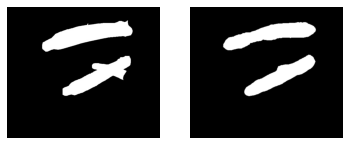

   pixel acc is : 0.976802
   mIoU is : 0.895724
   mIoU (2nd code) is : 0.895724
   recall:  0.9821787939771598
   precision:  0.9916417785176223
   F2 score:  0.9840569148013188
dice coeff:  tensor(0.9432, dtype=torch.float64)
   14


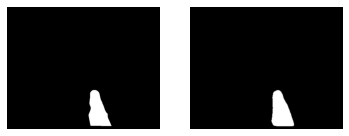

   pixel acc is : 0.997418
   mIoU is : 0.956026
   mIoU (2nd code) is : 0.956026
   recall:  0.9996271559706
   precision:  0.9977151164521539
   F2 score:  0.9992441620087302
dice coeff:  tensor(0.9771, dtype=torch.float64)
   15


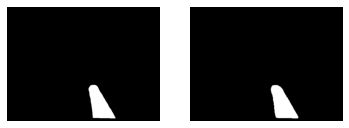

   pixel acc is : 0.998020
   mIoU is : 0.966921
   mIoU (2nd code) is : 0.966921
   recall:  0.9998297491248406
   precision:  0.9981304233438647
   F2 score:  0.9994894212274873
dice coeff:  tensor(0.9829, dtype=torch.float64)
   16


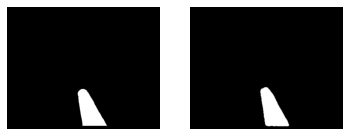

   pixel acc is : 0.997656
   mIoU is : 0.965269
   mIoU (2nd code) is : 0.965269
   recall:  0.9998076433057372
   precision:  0.9977687252565343
   F2 score:  0.999399193330896
dice coeff:  tensor(0.9821, dtype=torch.float64)
   17


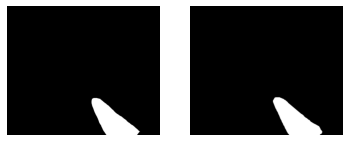

   pixel acc is : 0.997720
   mIoU is : 0.974487
   mIoU (2nd code) is : 0.974487
   recall:  0.999936959228381
   precision:  0.9976759106090435
   F2 score:  0.9994839299959547
dice coeff:  tensor(0.9869, dtype=torch.float64)
   18


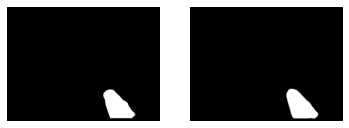

   pixel acc is : 0.998472
   mIoU is : 0.976659
   mIoU (2nd code) is : 0.976659
   recall:  0.9998315600348109
   precision:  0.9985887322890575
   F2 score:  0.9995827470586475
dice coeff:  tensor(0.9881, dtype=torch.float64)
   19


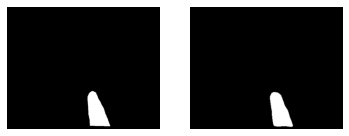

   pixel acc is : 0.998098
   mIoU is : 0.965596
   mIoU (2nd code) is : 0.965596
   recall:  0.9993576022441756
   precision:  0.9986863238880848
   F2 score:  0.9992232743894818
dice coeff:  tensor(0.9822, dtype=torch.float64)
   20


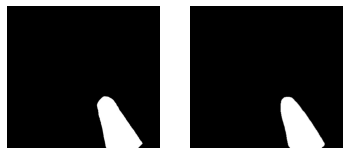

   pixel acc is : 0.997575
   mIoU is : 0.979875
   mIoU (2nd code) is : 0.979875
   recall:  0.9985900277785572
   precision:  0.9988212428871129
   F2 score:  0.998636262236109
dice coeff:  tensor(0.9898, dtype=torch.float64)
   21


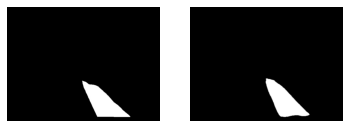

   pixel acc is : 0.993908
   mIoU is : 0.932340
   mIoU (2nd code) is : 0.932340
   recall:  0.9972033796045455
   precision:  0.9964230325496946
   F2 score:  0.9970472124284868
dice coeff:  tensor(0.9639, dtype=torch.float64)
   22


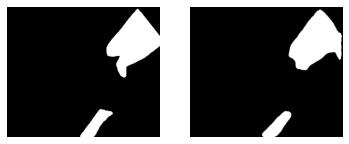

   pixel acc is : 0.980778
   mIoU is : 0.911412
   mIoU (2nd code) is : 0.911412
   recall:  0.9888523248478235
   precision:  0.9894562999460872
   F2 score:  0.9889730608725783
dice coeff:  tensor(0.9524, dtype=torch.float64)
   23


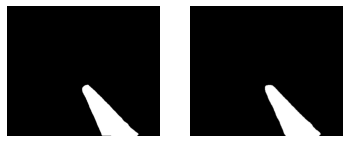

   pixel acc is : 0.998162
   mIoU is : 0.983715
   mIoU (2nd code) is : 0.983715
   recall:  0.9992787896544951
   precision:  0.9987674900562513
   F2 score:  0.9991764878591517
dice coeff:  tensor(0.9917, dtype=torch.float64)
   24


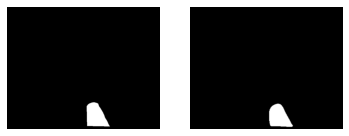

   pixel acc is : 0.997813
   mIoU is : 0.948918
   mIoU (2nd code) is : 0.948918
   recall:  0.9986803880053179
   precision:  0.9990862406561334
   F2 score:  0.998761532154614
dice coeff:  tensor(0.9731, dtype=torch.float64)
   25


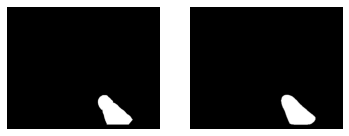

   pixel acc is : 0.997408
   mIoU is : 0.960215
   mIoU (2nd code) is : 0.960215
   recall:  0.999615858556127
   precision:  0.9977070215928358
   F2 score:  0.9992335070617586
dice coeff:  tensor(0.9793, dtype=torch.float64)
   26


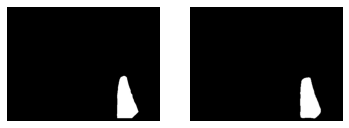

   pixel acc is : 0.997746
   mIoU is : 0.967664
   mIoU (2nd code) is : 0.967664
   recall:  0.998870816221826
   precision:  0.9987936002248823
   F2 score:  0.9988553720673301
dice coeff:  tensor(0.9833, dtype=torch.float64)
   27


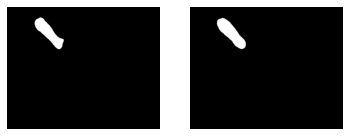

   pixel acc is : 0.996923
   mIoU is : 0.928407
   mIoU (2nd code) is : 0.928407
   recall:  0.9993249286124326
   precision:  0.9975357282513262
   F2 score:  0.9989665752609544
dice coeff:  tensor(0.9616, dtype=torch.float64)
   28


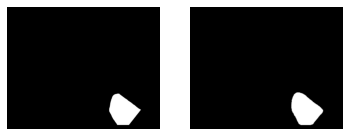

   pixel acc is : 0.996783
   mIoU is : 0.955269
   mIoU (2nd code) is : 0.955269
   recall:  0.9998347099159024
   precision:  0.9968339575530587
   F2 score:  0.9992331150147271
dice coeff:  tensor(0.9767, dtype=torch.float64)
   29


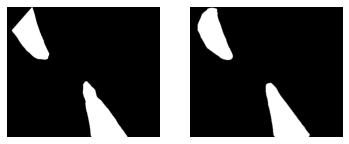

   pixel acc is : 0.990265
   mIoU is : 0.952052
   mIoU (2nd code) is : 0.952052
   recall:  0.9962590847040079
   precision:  0.9928133283906752
   F2 score:  0.9955680212993082
dice coeff:  tensor(0.9751, dtype=torch.float64)
   30


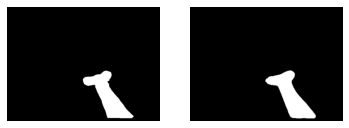

   pixel acc is : 0.996327
   mIoU is : 0.965288
   mIoU (2nd code) is : 0.965288
   recall:  0.9994160178641093
   precision:  0.9967037268652228
   F2 score:  0.9988723793704268
dice coeff:  tensor(0.9821, dtype=torch.float64)
   31


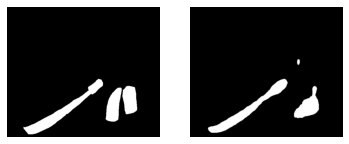

   pixel acc is : 0.967058
   mIoU is : 0.778499
   mIoU (2nd code) is : 0.778499
   recall:  0.9743387224680873
   precision:  0.9905948061743326
   F2 score:  0.9775471155746394
dice coeff:  tensor(0.8629, dtype=torch.float64)
   32


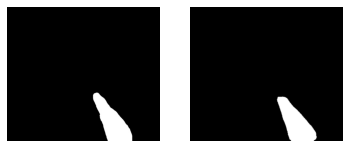

   pixel acc is : 0.996487
   mIoU is : 0.960000
   mIoU (2nd code) is : 0.960000
   recall:  0.9982129599821296
   precision:  0.9981113173151144
   F2 score:  0.9981926297926352
dice coeff:  tensor(0.9792, dtype=torch.float64)
   33


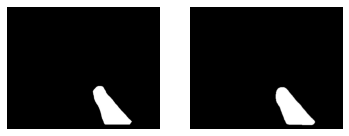

   pixel acc is : 0.995628
   mIoU is : 0.947623
   mIoU (2nd code) is : 0.947623
   recall:  0.9993222405869547
   precision:  0.9961222690753471
   F2 score:  0.998680602591961
dice coeff:  tensor(0.9725, dtype=torch.float64)
   34


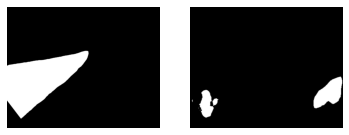

   pixel acc is : 0.833704
   mIoU is : 0.456539
   mIoU (2nd code) is : 0.456539
   recall:  0.8568442627403123
   precision:  0.9652456983413424
   F2 score:  0.8765319594411377
dice coeff:  tensor(0.5296, dtype=torch.float64)
   35


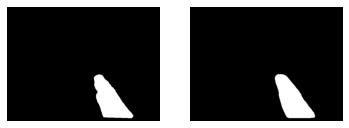

   pixel acc is : 0.995911
   mIoU is : 0.961057
   mIoU (2nd code) is : 0.961057
   recall:  0.9994593391976689
   precision:  0.9962252363102222
   F2 score:  0.9988108398616806
dice coeff:  tensor(0.9798, dtype=torch.float64)
   36


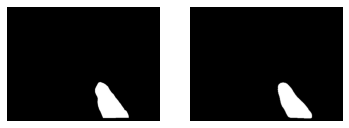

   pixel acc is : 0.995890
   mIoU is : 0.948093
   mIoU (2nd code) is : 0.948093
   recall:  0.9975396976603607
   precision:  0.9981830035516162
   F2 score:  0.9976682924947342
dice coeff:  tensor(0.9727, dtype=torch.float64)
   37


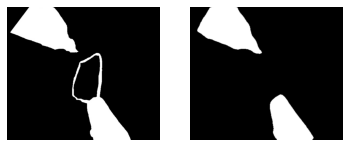

   pixel acc is : 0.980585
   mIoU is : 0.928871
   mIoU (2nd code) is : 0.928871
   recall:  0.9822873543996642
   precision:  0.9948807820201727
   F2 score:  0.9847804695123538
dice coeff:  tensor(0.9625, dtype=torch.float64)
   38


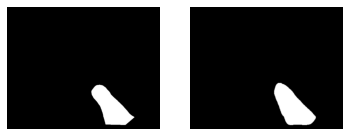

   pixel acc is : 0.993164
   mIoU is : 0.931859
   mIoU (2nd code) is : 0.931859
   recall:  0.99946052547872
   precision:  0.9933659765393817
   F2 score:  0.9982356403695244
dice coeff:  tensor(0.9637, dtype=torch.float64)
   39


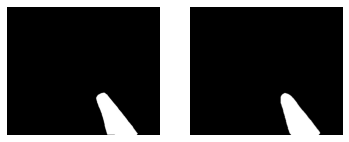

   pixel acc is : 0.998028
   mIoU is : 0.977556
   mIoU (2nd code) is : 0.977556
   recall:  0.9990266323344653
   precision:  0.9989085888769349
   F2 score:  0.9990030214110946
dice coeff:  tensor(0.9885, dtype=torch.float64)
   40


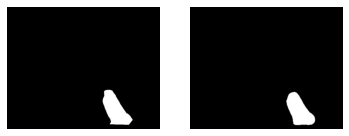

   pixel acc is : 0.996600
   mIoU is : 0.946254
   mIoU (2nd code) is : 0.946254
   recall:  0.9977937957656797
   precision:  0.9986979814978939
   F2 score:  0.9979745019095707
dice coeff:  tensor(0.9717, dtype=torch.float64)
   41


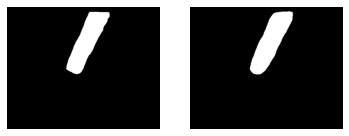

   pixel acc is : 0.992928
   mIoU is : 0.945592
   mIoU (2nd code) is : 0.945592
   recall:  0.9981318567584351
   precision:  0.9943010910665543
   F2 score:  0.9973633440181934
dice coeff:  tensor(0.9714, dtype=torch.float64)
   42


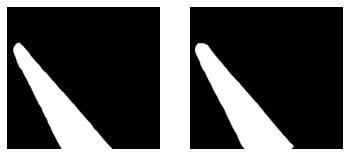

   pixel acc is : 0.990114
   mIoU is : 0.963620
   mIoU (2nd code) is : 0.963620
   recall:  0.999666288460255
   precision:  0.9886698971826173
   F2 score:  0.997447484620664
dice coeff:  tensor(0.9813, dtype=torch.float64)
   43


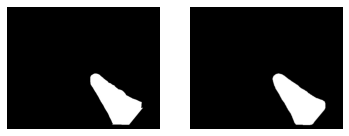

   pixel acc is : 0.996074
   mIoU is : 0.971956
   mIoU (2nd code) is : 0.971956
   recall:  0.9999139190317196
   precision:  0.9958563033549654
   F2 score:  0.9990997528099493
dice coeff:  tensor(0.9856, dtype=torch.float64)
   44


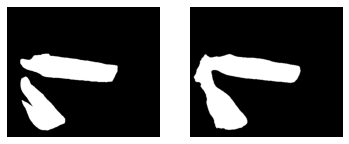

   pixel acc is : 0.974855
   mIoU is : 0.911018
   mIoU (2nd code) is : 0.911018
   recall:  0.9941545171609512
   precision:  0.976193177386532
   F2 score:  0.9905095666963566
dice coeff:  tensor(0.9524, dtype=torch.float64)
   45


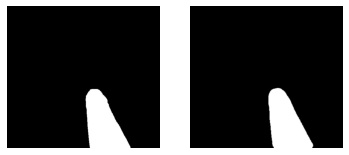

   pixel acc is : 0.996763
   mIoU is : 0.977765
   mIoU (2nd code) is : 0.977765
   recall:  0.9998037928623411
   precision:  0.9966926395226021
   F2 score:  0.9991800093407633
dice coeff:  tensor(0.9887, dtype=torch.float64)
   46


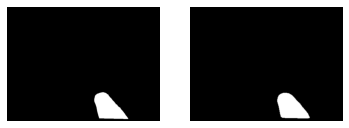

   pixel acc is : 0.997509
   mIoU is : 0.960802
   mIoU (2nd code) is : 0.960802
   recall:  0.9988186981867251
   precision:  0.9986088775088637
   F2 score:  0.9987767269976818
dice coeff:  tensor(0.9797, dtype=torch.float64)
   47


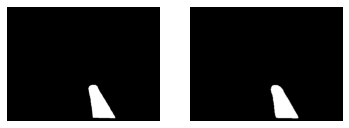

   pixel acc is : 0.997726
   mIoU is : 0.961990
   mIoU (2nd code) is : 0.961990
   recall:  0.999848406754995
   precision:  0.997809870710221
   F2 score:  0.9994400334581173
dice coeff:  tensor(0.9803, dtype=torch.float64)
   48


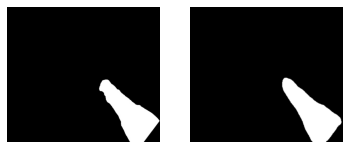

   pixel acc is : 0.994675
   mIoU is : 0.964179
   mIoU (2nd code) is : 0.964179
   recall:  0.9993206802852453
   precision:  0.9949121295244111
   F2 score:  0.9984358473469698
dice coeff:  tensor(0.9815, dtype=torch.float64)
   49


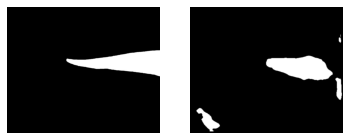

   pixel acc is : 0.932604
   mIoU is : 0.642184
   mIoU (2nd code) is : 0.642184
   recall:  0.9660331332016472
   precision:  0.9614558088253704
   F2 score:  0.9651141849475307
dice coeff:  tensor(0.7435, dtype=torch.float64)
   50


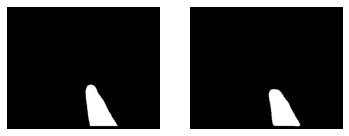

   pixel acc is : 0.995932
   mIoU is : 0.949456
   mIoU (2nd code) is : 0.949456
   recall:  0.9968486472517243
   precision:  0.9989163611861194
   F2 score:  0.9972615049423434
dice coeff:  tensor(0.9735, dtype=torch.float64)
   51


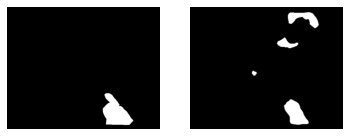

   pixel acc is : 0.965381
   mIoU is : 0.652859
   mIoU (2nd code) is : 0.652859
   recall:  0.9871721757306409
   precision:  0.9769982048107094
   F2 score:  0.9851204653145134
dice coeff:  tensor(0.7453, dtype=torch.float64)
   52


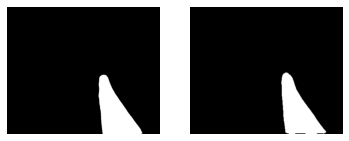

   pixel acc is : 0.995680
   mIoU is : 0.968369
   mIoU (2nd code) is : 0.968369
   recall:  0.9990971434818873
   precision:  0.9962537859971954
   F2 score:  0.9985271743124537
dice coeff:  tensor(0.9837, dtype=torch.float64)
   53


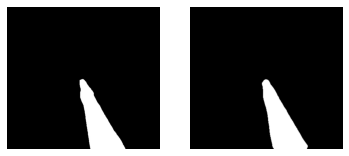

   pixel acc is : 0.995513
   mIoU is : 0.965373
   mIoU (2nd code) is : 0.965373
   recall:  0.9997311647288124
   precision:  0.9954669052382429
   F2 score:  0.9988753926583144
dice coeff:  tensor(0.9821, dtype=torch.float64)
   54


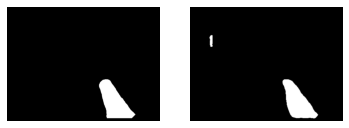

   pixel acc is : 0.994627
   mIoU is : 0.939341
   mIoU (2nd code) is : 0.939341
   recall:  0.9973990721781115
   precision:  0.9969818223931288
   F2 score:  0.9973155942835447
dice coeff:  tensor(0.9679, dtype=torch.float64)
   55


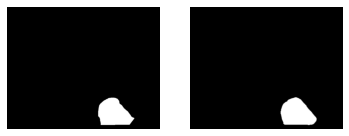

   pixel acc is : 0.998208
   mIoU is : 0.976143
   mIoU (2nd code) is : 0.976143
   recall:  0.9994833493010168
   precision:  0.9986543140886047
   F2 score:  0.9993174321607309
dice coeff:  tensor(0.9878, dtype=torch.float64)
   56


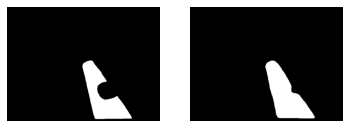

   pixel acc is : 0.986172
   mIoU is : 0.907411
   mIoU (2nd code) is : 0.907411
   recall:  0.9982121280587837
   precision:  0.9869151072359045
   F2 score:  0.9959320807938448
dice coeff:  tensor(0.9497, dtype=torch.float64)
   57


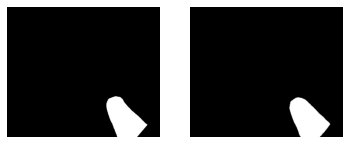

   pixel acc is : 0.997021
   mIoU is : 0.970243
   mIoU (2nd code) is : 0.970243
   recall:  0.9986471143236372
   precision:  0.9982129213141901
   F2 score:  0.9985602455066037
dice coeff:  tensor(0.9847, dtype=torch.float64)
   58


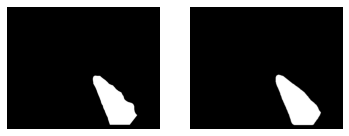

   pixel acc is : 0.995870
   mIoU is : 0.966108
   mIoU (2nd code) is : 0.966108
   recall:  0.9998736279607163
   precision:  0.9957263091388667
   F2 score:  0.9990414026443887
dice coeff:  tensor(0.9825, dtype=torch.float64)
   59


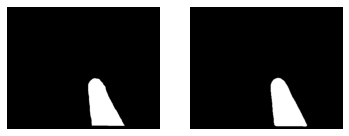

   pixel acc is : 0.996682
   mIoU is : 0.970452
   mIoU (2nd code) is : 0.970452
   recall:  0.9998769265482256
   precision:  0.9966061064527423
   F2 score:  0.9992210461043337
dice coeff:  tensor(0.9848, dtype=torch.float64)
   60


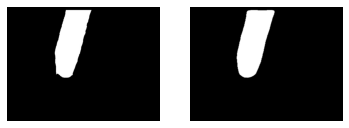

   pixel acc is : 0.993745
   mIoU is : 0.963367
   mIoU (2nd code) is : 0.963367
   recall:  0.9992493803023427
   precision:  0.9938834279591335
   F2 score:  0.9981715595301855
dice coeff:  tensor(0.9811, dtype=torch.float64)
   61


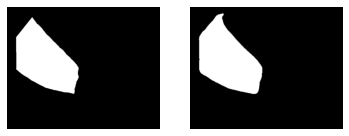

   pixel acc is : 0.989029
   mIoU is : 0.960416
   mIoU (2nd code) is : 0.960416
   recall:  0.9998641708788144
   precision:  0.9871518692988738
   F2 score:  0.9972955849025494
dice coeff:  tensor(0.9796, dtype=torch.float64)
   62


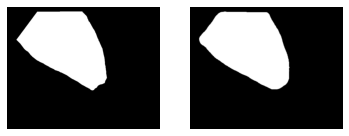

   pixel acc is : 0.987432
   mIoU is : 0.967011
   mIoU (2nd code) is : 0.967011
   recall:  0.9980021688893479
   precision:  0.9853637551384595
   F2 score:  0.9954486161707082
dice coeff:  tensor(0.9832, dtype=torch.float64)
   63


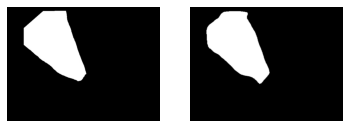

   pixel acc is : 0.991559
   mIoU is : 0.968290
   mIoU (2nd code) is : 0.968290
   recall:  0.9964908808370533
   precision:  0.9935412127693051
   F2 score:  0.9958995469186457
dice coeff:  tensor(0.9838, dtype=torch.float64)
   64


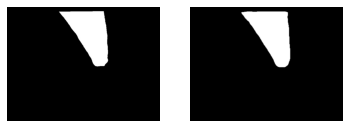

   pixel acc is : 0.992793
   mIoU is : 0.957527
   mIoU (2nd code) is : 0.957527
   recall:  0.9975223449164538
   precision:  0.9945633437420168
   F2 score:  0.9969291369512435
dice coeff:  tensor(0.9780, dtype=torch.float64)
   65


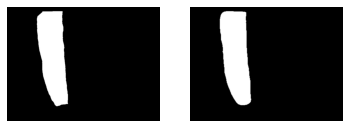

   pixel acc is : 0.993485
   mIoU is : 0.970382
   mIoU (2nd code) is : 0.970382
   recall:  0.9982810241585794
   precision:  0.994303195454896
   F2 score:  0.9974829142488717
dice coeff:  tensor(0.9848, dtype=torch.float64)
   66


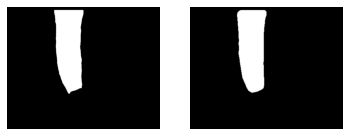

   pixel acc is : 0.994464
   mIoU is : 0.970967
   mIoU (2nd code) is : 0.970967
   recall:  0.9978802717130745
   precision:  0.9959435047688685
   F2 score:  0.9974923159434212
dice coeff:  tensor(0.9851, dtype=torch.float64)
   67


In [ ]:
# PATH = 'pathmax101res.pth'
# UNET.load_state_dict(torch.load(PATH))   
os.environ['KMP_DUPLICATE_LIB_OK']='True'
def matplotlib_imshow(display_list):
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.imshow(display_list[i])
        plt.axis('off')
    plt.show()

import matplotlib.pyplot as plt

# import numpy
CUDA_LAUNCH_BLOCKING=1
los=0
kb=0
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
transform_img = transforms.Compose([ 
    transforms.ToTensor()]);
# from google.colab.patches import cv2_imshow
kb=los
los=0
fs=0
p=0
pre=0
rec=0
di=0
with torch.no_grad():
  correct = 0;
  total = 0;
  UNET.eval()
  import cv2
  def _fast_hist(label_pred, label_true, n_class):
      mask = (label_true >= 0) & (label_true < n_class)
      hist = np.bincount(
          n_class * label_true[mask].astype(int) + label_pred[mask], minlength=n_class ** 2
      ).reshape(n_class, n_class)
      return hist


  def evaluate(predictions, gts, num_classes):
      hist = np.zeros((num_classes, num_classes))
      for lp, lt in zip(predictions, gts):
          hist += _fast_hist(lp.flatten(), lt.flatten(), num_classes)
      
      iu = np.diag(hist) / (hist.sum(axis=1) + hist.sum(axis=0) - np.diag(hist))
      mean_iu = np.nanmean(iu)
      
      return mean_iu

  for i, data in enumerate(val_loader):
      print('  ',i)
      inputs, labels = data;
      inputs = inputs.to(device);

      outputs= UNET.forward(inputs);
      
      inputs=inputs.squeeze(0)
      inputs= np.array(inputs.cpu())
      inputs = inputs.reshape(size,size,3)
      outputs = corr(outputs);
      labels = labels.detach().numpy();
      outputs = outputs.reshape(1, size, size);
      correct=correct+1

      color_pred=labels[0]
      d1,a1,b1 =labels[0].shape
      
      color_pre=outputs
      
      dd,aa,bb = color_pre.shape
      d1,a1,b1 =labels[0].shape

      color_pre=np.array(color_pre).reshape(aa,bb)


      color_pre=visualize_prediction(color_pre)
      img = cv2.resize(color_pre, (a1,d1))
      inputs = cv2.resize(inputs, (a1,d1))
      inputs=inputs
      color_preds=copy.deepcopy(color_pred)
      


      img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY);
      img2 = cv2.cvtColor(color_preds, cv2.COLOR_BGR2GRAY);
      img1 = class_pixel(img1)
      img2 = class_pixel(img2)
      
      io=evaluate(img1,img2,2)
      matplotlib_imshow([color_pred,img])
      cv2.imwrite('result/'+'genintru'+'.jpg',img)
      cv2.imwrite('result/'+'gtintru'+'.jpg',color_pred)
      total=total+io
      metric = SegmentationMetric(2) 
      metric.addBatch(img1, img2)
      pa = metric.pixelAccuracy()
      
      cpa = metric.recall()[0]
      prec = metric.precision()[0]

      # mpa = metric.meanPixelAccuracy()
      mIoU,per= metric.meanIntersectionOverUnion()
      print('   pixel acc is : %f' % pa)
      
      print('   mIoU is : %f' % mIoU)
      print('   mIoU (2nd code) is : %f' % io)
      print('   recall: ',cpa)
      print('   precision: ',prec)
      ff= (5 * prec * cpa) / (4 * prec + cpa)
      print('   F2 score: ',ff)
      pre=pre+cpa
      p=p+pa
      rec=rec+prec
      fs=fs+ff
      dice=eval_metrics(img1, img2, 2)
      print('dice coeff: ',dice)
      di=di+dice.item()
     
print(" ")
print(" ")      
print("Final test results")
print(" ")
print("mIoU score ", (total/correct) * 100);
print('f2 score: ',(fs/correct)*100)
print('recall : ',(pre/correct) * 100)
print('dice coefficient: ',(di/correct) * 100)
print('precision : ',(rec/correct) * 100)

print('pixel accuracy : ',(p/correct) * 100)




